#¿Como funciona un PCA?

CELDA 1: Verificación de Librerías

In [2]:
"""
CELDA 1: Verificación de librerías necesarias
──────────────────────────────────────────────
Verificamos que tenemos todas las librerías instaladas
"""

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("✓ scikit-learn:", sklearn.__version__)
print("✓ pandas:", pd.__version__)
print("✓ numpy:", np.__version__)
print("\n✅ Todas las librerías están disponibles")

✓ scikit-learn: 1.6.1
✓ pandas: 2.2.2
✓ numpy: 2.0.2

✅ Todas las librerías están disponibles


CELDA 2: Importación de Librerías

In [3]:
"""
CELDA 2: Importación de librerías
──────────────────────────────────
Importamos todas las herramientas necesarias para PCA
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("✅ Librerías importadas correctamente")
print("\nLibrerías principales:")
print("  • pandas: Manipulación de datos")
print("  • numpy: Cálculos matemáticos")
print("  • sklearn: Machine Learning (PCA, Clustering)")
print("  • matplotlib/seaborn: Visualización")

✅ Librerías importadas correctamente

Librerías principales:
  • pandas: Manipulación de datos
  • numpy: Cálculos matemáticos
  • sklearn: Machine Learning (PCA, Clustering)
  • matplotlib/seaborn: Visualización


CELDA 3: Creamos un Dataset de Ejemplo

In [4]:
"""
CELDA 3: Crear dataset de clientes
───────────────────────────────────
Generamos datos sintéticos de 300 clientes con 6 variables

CONTEXTO DEL PROBLEMA:
━━━━━━━━━━━━━━━━━━━━
Tenemos 300 clientes con 6 características diferentes.
Queremos identificar grupos (segmentos) de clientes similares,
pero con 6 variables es IMPOSIBLE visualizar en un gráfico.

SOLUCIÓN: Usar PCA para reducir de 6 → 2 dimensiones
"""

np.random.seed(42)
n_clientes = 300

print("="*70)
print("CREACIÓN DEL DATASET")
print("="*70)

# Generar datos con correlaciones realistas
edad = np.random.randint(18, 70, n_clientes)
ingresos = edad * 1500 + np.random.randint(-10000, 10000, n_clientes)
gasto = ingresos * 0.3 + np.random.randint(-5000, 5000, n_clientes)
frecuencia = (gasto / 1000).astype(int) + np.random.randint(-5, 5, n_clientes)
antiguedad = (edad - 18) * 0.2 + np.random.randint(-2, 3, n_clientes)
productos = frecuencia * 2 + np.random.randint(-10, 10, n_clientes)

# Crear DataFrame
df = pd.DataFrame({
    'Edad': edad,
    'Ingresos_Anuales': np.maximum(ingresos, 20000),
    'Gasto_Anual': np.maximum(gasto, 5000),
    'Frecuencia_Compra': np.maximum(frecuencia, 1),
    'Antiguedad_Años': np.maximum(antiguedad, 0),
    'Productos_Comprados': np.maximum(productos, 1)
})

print(f"\n📊 Dataset creado exitosamente:")
print(f"   • Número de clientes: {len(df)}")
print(f"   • Número de variables: {len(df.columns)}")
print(f"   • Variables: {list(df.columns)}")

print(f"\n🔍 Primeros 10 clientes:")
print(df.head(10).to_string(index=True))

print(f"\n📈 Estadísticas descriptivas:")
print(df.describe().round(1).to_string())

print("\n✅ Dataset listo para análisis")

CREACIÓN DEL DATASET

📊 Dataset creado exitosamente:
   • Número de clientes: 300
   • Número de variables: 6
   • Variables: ['Edad', 'Ingresos_Anuales', 'Gasto_Anual', 'Frecuencia_Compra', 'Antiguedad_Años', 'Productos_Comprados']

🔍 Primeros 10 clientes:
   Edad  Ingresos_Anuales  Gasto_Anual  Frecuencia_Compra  Antiguedad_Años  Productos_Comprados
0    56             81158      26285.4                 25              9.6                   54
1    69            103748      28805.4                 26             11.2                   47
2    46             66400      24329.0                 26              4.6                   49
3    32             57554      13806.2                 13              1.8                   20
4    60             89874      28134.2                 24              6.4                   53
5    25             42651      13336.3                 11              3.4                   29
6    38             65639      24271.7                 22             

CELDA 4: PASO 1 - ESTANDARIZACIÓN DE DATOS

In [5]:
"""
CELDA 4: PASO 1 - ESTANDARIZACIÓN (NORMALIZACIÓN)
──────────────────────────────────────────────────

¿QUÉ ES LA ESTANDARIZACIÓN?
━━━━━━━━━━━━━━━━━━━━━━━━━━
Transformar todas las variables a la misma escala para que ninguna
domine sobre las demás por tener valores más grandes.

PROBLEMA SIN ESTANDARIZACIÓN:
  - Ingresos: rango 20,000 - 120,000 (muy grande)
  - Edad: rango 18 - 70 (pequeño)
  - Sin estandarizar, "Ingresos" dominaría el análisis

FÓRMULA: z = (x - media) / desviación_estándar

RESULTADO: Todas las variables con media=0 y desviación_estándar=1
"""

print("="*70)
print("PASO 1: ESTANDARIZACIÓN DE DATOS")
print("="*70)

# Comparar ANTES y DESPUÉS
print("\n📊 ANTES DE ESTANDARIZAR (Cliente 1):")
print(f"   Edad: {df.iloc[0]['Edad']:.0f} años")
print(f"   Ingresos: ${df.iloc[0]['Ingresos_Anuales']:,.0f}")
print(f"   Gasto: ${df.iloc[0]['Gasto_Anual']:,.0f}")
print(f"   Frecuencia: {df.iloc[0]['Frecuencia_Compra']:.0f} compras")
print(f"   Antigüedad: {df.iloc[0]['Antiguedad_Años']:.1f} años")
print(f"   Productos: {df.iloc[0]['Productos_Comprados']:.0f} productos")

print("\n⚠️  Problema: Las escalas son MUY diferentes")
print("   → Ingresos (20,000-120,000) vs Edad (18-70)")

# Aplicar estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Crear DataFrame con datos estandarizados
df_scaled = pd.DataFrame(
    X_scaled,
    columns=df.columns
)

print("\n📊 DESPUÉS DE ESTANDARIZAR (Cliente 1):")
print(f"   Edad: {df_scaled.iloc[0]['Edad']:.2f}")
print(f"   Ingresos: {df_scaled.iloc[0]['Ingresos_Anuales']:.2f}")
print(f"   Gasto: {df_scaled.iloc[0]['Gasto_Anual']:.2f}")
print(f"   Frecuencia: {df_scaled.iloc[0]['Frecuencia_Compra']:.2f}")
print(f"   Antigüedad: {df_scaled.iloc[0]['Antiguedad_Años']:.2f}")
print(f"   Productos: {df_scaled.iloc[0]['Productos_Comprados']:.2f}")

print("\n✅ Ahora todas las variables están en la misma escala")
print("   → Media = 0, Desviación Estándar = 1")

# Verificar estadísticas
print("\n📈 Verificación estadística:")
print(f"   Media de cada variable: {df_scaled.mean().round(10).values}")
print(f"   Desviación estándar: {df_scaled.std().round(2).values}")

print("\n✅ PASO 1 COMPLETADO: Datos estandarizados")

PASO 1: ESTANDARIZACIÓN DE DATOS

📊 ANTES DE ESTANDARIZAR (Cliente 1):
   Edad: 56 años
   Ingresos: $81,158
   Gasto: $26,285
   Frecuencia: 25 compras
   Antigüedad: 9.6 años
   Productos: 54 productos

⚠️  Problema: Las escalas son MUY diferentes
   → Ingresos (20,000-120,000) vs Edad (18-70)

📊 DESPUÉS DE ESTANDARIZAR (Cliente 1):
   Edad: 0.83
   Ingresos: 0.70
   Gasto: 0.90
   Frecuencia: 0.83
   Antigüedad: 1.40
   Productos: 1.03

✅ Ahora todas las variables están en la misma escala
   → Media = 0, Desviación Estándar = 1

📈 Verificación estadística:
   Media de cada variable: [-0. -0.  0. -0.  0. -0.]
   Desviación estándar: [1. 1. 1. 1. 1. 1.]

✅ PASO 1 COMPLETADO: Datos estandarizados


CELDA 5: PASO 2 - MATRIZ DE COVARIANZA

PASO 2: MATRIZ DE COVARIANZA

📊 MATRIZ DE COVARIANZA (6×6):
   (Muestra cómo se relacionan las variables entre sí)

                      Edad  Ingresos_Anuales  Gasto_Anual  Frecuencia_Compra  Antiguedad_Años  Productos_Comprados
Edad                 1.003             0.974        0.907              0.846            0.908                0.803
Ingresos_Anuales     0.974             1.003        0.935              0.868            0.880                0.820
Gasto_Anual          0.907             0.935        1.003              0.940            0.806                0.882
Frecuencia_Compra    0.846             0.868        0.940              1.003            0.752                0.946
Antiguedad_Años      0.908             0.880        0.806              0.752            1.003                0.714
Productos_Comprados  0.803             0.820        0.882              0.946            0.714                1.003


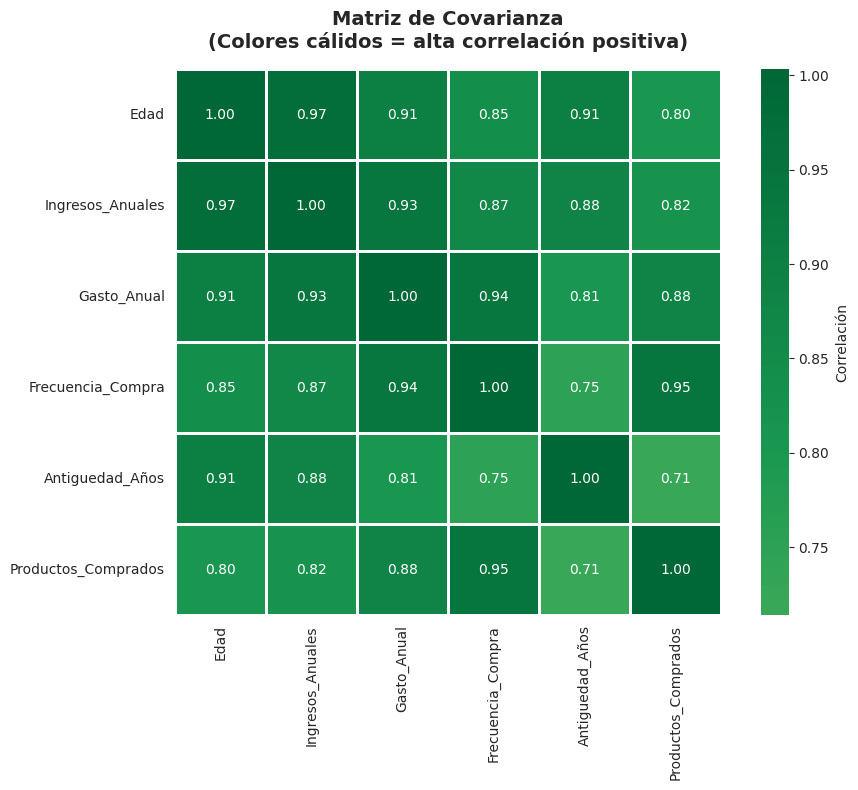


🔍 INTERPRETACIÓN DE CORRELACIONES:
   (Valores cercanos a 1 = fuertemente correlacionados)

   ↗ Edad ←→ Ingresos_Anuales: 0.974
   ↗ Edad ←→ Gasto_Anual: 0.907
   ↗ Edad ←→ Frecuencia_Compra: 0.846
   ↗ Edad ←→ Antiguedad_Años: 0.908
   ↗ Edad ←→ Productos_Comprados: 0.803
   ↗ Ingresos_Anuales ←→ Gasto_Anual: 0.935
   ↗ Ingresos_Anuales ←→ Frecuencia_Compra: 0.868
   ↗ Ingresos_Anuales ←→ Antiguedad_Años: 0.880
   ↗ Ingresos_Anuales ←→ Productos_Comprados: 0.820
   ↗ Gasto_Anual ←→ Frecuencia_Compra: 0.940
   ↗ Gasto_Anual ←→ Antiguedad_Años: 0.806
   ↗ Gasto_Anual ←→ Productos_Comprados: 0.882
   ↗ Frecuencia_Compra ←→ Antiguedad_Años: 0.752
   ↗ Frecuencia_Compra ←→ Productos_Comprados: 0.946
   ↗ Antiguedad_Años ←→ Productos_Comprados: 0.714

💡 CONCLUSIÓN:
   Las variables con alta correlación tienen información redundante.
   PCA creará componentes que combinan estas variables relacionadas.

✅ PASO 2 COMPLETADO: Matriz de covarianza calculada


In [6]:
"""
CELDA 5: PASO 2 - CALCULAR MATRIZ DE COVARIANZA
────────────────────────────────────────────────

¿QUÉ ES LA COVARIANZA?
━━━━━━━━━━━━━━━━━━━━━
Mide cómo dos variables se relacionan entre sí:
  - Covarianza POSITIVA alta → Cuando una sube, la otra también
  - Covarianza NEGATIVA → Cuando una sube, la otra baja
  - Covarianza cercana a 0 → No hay relación lineal

¿POR QUÉ ES IMPORTANTE PARA PCA?
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Si dos variables están MUY correlacionadas (ej: Ingresos y Gasto),
tienen información redundante. PCA las combinará en un solo componente.

MATRIZ DE COVARIANZA:
  - Es una matriz cuadrada (6x6 en nuestro caso)
  - Diagonal = varianza de cada variable (siempre 1 tras estandarizar)
  - Fuera diagonal = correlación entre pares de variables
"""

print("="*70)
print("PASO 2: MATRIZ DE COVARIANZA")
print("="*70)

# Calcular matriz de covarianza
cov_matrix = np.cov(X_scaled.T)

print("\n📊 MATRIZ DE COVARIANZA (6×6):")
print("   (Muestra cómo se relacionan las variables entre sí)")
print()

# Crear DataFrame para mejor visualización
cov_df = pd.DataFrame(
    cov_matrix,
    columns=df.columns,
    index=df.columns
)
print(cov_df.round(3).to_string())

# Visualizar con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    cov_df,
    annot=True,
    fmt='.2f',
    cmap='RdYlGn',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={'label': 'Correlación'}
)
plt.title('Matriz de Covarianza\n(Colores cálidos = alta correlación positiva)', 
          fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

# Identificar correlaciones fuertes
print("\n🔍 INTERPRETACIÓN DE CORRELACIONES:")
print("   (Valores cercanos a 1 = fuertemente correlacionados)")
print()

correlaciones_fuertes = []
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        corr = cov_matrix[i, j]
        if abs(corr) > 0.5:
            var1 = df.columns[i]
            var2 = df.columns[j]
            correlaciones_fuertes.append((var1, var2, corr))
            signo = "↗" if corr > 0 else "↘"
            print(f"   {signo} {var1} ←→ {var2}: {corr:.3f}")

if len(correlaciones_fuertes) == 0:
    print("   No hay correlaciones fuertes (>0.5)")

print("\n💡 CONCLUSIÓN:")
print("   Las variables con alta correlación tienen información redundante.")
print("   PCA creará componentes que combinan estas variables relacionadas.")

print("\n✅ PASO 2 COMPLETADO: Matriz de covarianza calculada")

CELDA 6: PASO 3 - VECTORES Y VALORES PROPIOS

In [8]:
"""
CELDA 6: PASO 3 - CALCULAR VECTORES Y VALORES PROPIOS
──────────────────────────────────────────────────────

¿QUÉ SON LOS VALORES Y VECTORES PROPIOS?
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  • VECTOR PROPIO (Eigenvector):
    - Dirección en el espacio de datos
    - Cada componente principal es un vector propio
    - Indica cómo combinar las variables originales
  
  • VALOR PROPIO (Eigenvalue):
    - Cantidad de varianza en esa dirección
    - Valores altos = dirección importante
    - La suma de todos = varianza total

ANALOGÍA: Imagina una nube de puntos en forma de elipse
         
        ●
     ●  ●  ●
    ●   ●   ●
   ●    ●    ●  ← Eje mayor (PC1) = máxima varianza
    ●   ●   ●
     ●  ●  ●
        ●
        ↑
    Eje menor (PC2) = siguiente mayor varianza

PC1 apunta en la dirección del eje largo (máxima varianza)
PC2 es perpendicular a PC1 (siguiente mayor varianza)
"""

print("="*70)
print("PASO 3: VECTORES Y VALORES PROPIOS")
print("="*70)

# Calcular valores y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordenar de mayor a menor
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Calcular % varianza explicada
var_explicada = eigenvalues / np.sum(eigenvalues) * 100
var_acumulada = np.cumsum(var_explicada)

print("\n📊 VALORES PROPIOS (Varianza explicada por cada componente):")
print("="*70)

for i in range(len(eigenvalues)):
    print(f"   PC{i+1}: λ={eigenvalues[i]:.3f} → {var_explicada[i]:5.1f}% varianza | Acumulado: {var_acumulada[i]:.1f}%")

print("\n💡 INTERPRETACIÓN:")
print(f"   • PC1 captura el {var_explicada[0]:.1f}% de la varianza total (¡LA MÁS IMPORTANTE!)")
print(f"   • PC2 captura el {var_explicada[1]:.1f}% adicional")
print(f"   • PC1 + PC2 juntos = {var_acumulada[1]:.1f}% de la información")

print("\n📊 VECTORES PROPIOS (Pesos de cada variable en los componentes):")
print("="*70)

# Crear DataFrame con vectores propios
eigenvectors_df = pd.DataFrame(
    eigenvectors[:, :3],  # Mostrar solo primeros 3 componentes
    columns=['PC1', 'PC2', 'PC3'],
    index=df.columns
)
print(eigenvectors_df.round(3).to_string())

print("\n💡 INTERPRETACIÓN DE VECTORES PROPIOS:")
print("\n   PC1 (Principal componente):")
print("   ━━━━━━━━━━━━━━━━━━━━━━━━━━")

# Identificar variables más importantes en PC1
pc1_pesos = eigenvectors_df['PC1'].abs().sort_values(ascending=False)
print("   Variables con mayor influencia:")
for var in pc1_pesos.head(3).index:
    peso = eigenvectors_df.loc[var, 'PC1']
    signo = "+" if peso > 0 else "-"
    print(f"      {signo} {var}: {peso:.3f}")

print("\n   PC2 (Segundo componente):")
print("   ━━━━━━━━━━━━━━━━━━━━━━━━")

# Identificar variables más importantes en PC2
pc2_pesos = eigenvectors_df['PC2'].abs().sort_values(ascending=False)
print("   Variables con mayor influencia:")
for var in pc2_pesos.head(3).index:
    peso = eigenvectors_df.loc[var, 'PC2']
    signo = "+" if peso > 0 else "-"
    print(f"      {signo} {var}: {peso:.3f}")

print("\n💡 ¿QUÉ SIGNIFICA ESTO EN NEGOCIO?")
print("   Los componentes principales son COMBINACIONES de las variables originales")
print("   Ejemplo de fórmula de PC1:")
formula_pc1 = " + ".join([f"{eigenvectors_df.loc[var, 'PC1']:.2f}×{var}" for var in df.columns[:3]])
print(f"   PC1 ≈ {formula_pc1} + ...")

print("\n✅ PASO 3 COMPLETADO: Vectores y valores propios calculados")

PASO 3: VECTORES Y VALORES PROPIOS

📊 VALORES PROPIOS (Varianza explicada por cada componente):
   PC1: λ=5.335 →  88.6% varianza | Acumulado: 88.6%
   PC2: λ=0.417 →   6.9% varianza | Acumulado: 95.5%
   PC3: λ=0.137 →   2.3% varianza | Acumulado: 97.8%
   PC4: λ=0.070 →   1.2% varianza | Acumulado: 99.0%
   PC5: λ=0.036 →   0.6% varianza | Acumulado: 99.6%
   PC6: λ=0.024 →   0.4% varianza | Acumulado: 100.0%

💡 INTERPRETACIÓN:
   • PC1 captura el 88.6% de la varianza total (¡LA MÁS IMPORTANTE!)
   • PC2 captura el 6.9% adicional
   • PC1 + PC2 juntos = 95.5% de la información

📊 VECTORES PROPIOS (Pesos de cada variable en los componentes):
                       PC1    PC2    PC3
Edad                 0.417 -0.325 -0.227
Ingresos_Anuales     0.420 -0.223 -0.419
Gasto_Anual          0.419  0.149 -0.419
Frecuencia_Compra    0.410  0.435  0.068
Antiguedad_Años      0.387 -0.584  0.634
Productos_Comprados  0.395  0.541  0.437

💡 INTERPRETACIÓN DE VECTORES PROPIOS:

   PC1 (Principal comp

CELDA 7: PASO 4 - SELECCIONAR COMPONENTES

PASO 4: SELECCIONAR COMPONENTES PRINCIPALES


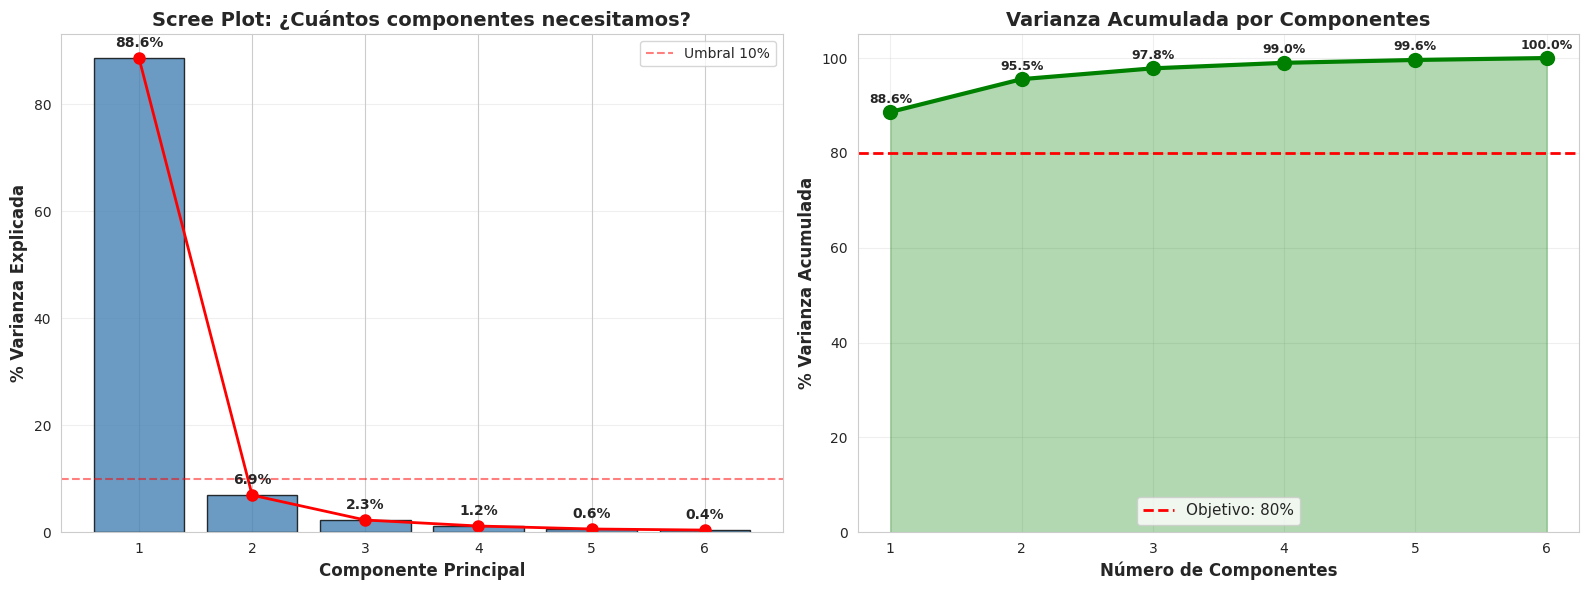


🔍 ANÁLISIS PARA TOMAR DECISIÓN:

   Tabla de Varianza:
   ─────────────────────────────────────────────────────────────────
   | Componentes |  Varianza  | Acumulada |     Decisión       |
   ─────────────────────────────────────────────────────────────────
   |      1      |    88.6%   |    88.6%  | ❌ Insuficiente (solo 1D) |
   |      2      |    95.5%   |    95.5%  | ✅ ÓPTIMO (78%+ y visualizable en 2D) |
   |      3      |    97.8%   |    97.8%  | ⚠️  Posible (90%+ pero difícil visualizar) |
   |      4      |    99.0%   |    99.0%  | ❌ Excesivo (poca ganancia adicional) |
   ─────────────────────────────────────────────────────────────────

💡 DECISIÓN FINAL:
   ━━━━━━━━━━━━━━
   Mantenemos: 2 componentes principales (PC1 y PC2)
   Razón: Explican 95.5% de varianza
   Beneficio: Podemos visualizar en un gráfico 2D
   Reducción: 6 variables → 2 componentes (67% reducción)

✅ PASO 4 COMPLETADO: Seleccionamos PC1 y PC2


In [9]:
"""
CELDA 7: PASO 4 - SELECCIONAR COMPONENTES PRINCIPALES
──────────────────────────────────────────────────────

¿CUÁNTOS COMPONENTES MANTENER?
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Criterios comunes:

1. REGLA DEL 80%: Mantener componentes que expliquen ≥80% varianza
2. REGLA DE KAISER: Mantener componentes con eigenvalue > 1
3. CRITERIO DEL CODO: Buscar "quiebre" en el Scree Plot

SCREE PLOT: Gráfico de barras con % varianza de cada componente
  - Forma típica: Escalera descendente
  - Buscamos el "codo" donde la curva se aplana
  - Componentes después del codo aportan poco

DECISIÓN PARA NUESTRO EJEMPLO:
  - Queremos VISUALIZAR en 2D → Necesitamos 2 componentes
  - Verificamos que PC1+PC2 expliquen suficiente varianza (>70%)
"""

print("="*70)
print("PASO 4: SELECCIONAR COMPONENTES PRINCIPALES")
print("="*70)

# Crear Scree Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: % Varianza por componente
axes[0].bar(
    range(1, len(var_explicada) + 1),
    var_explicada,
    color='steelblue',
    edgecolor='black',
    alpha=0.8
)
axes[0].plot(
    range(1, len(var_explicada) + 1),
    var_explicada,
    'ro-',
    linewidth=2,
    markersize=8
)
axes[0].set_xlabel('Componente Principal', fontsize=12, fontweight='bold')
axes[0].set_ylabel('% Varianza Explicada', fontsize=12, fontweight='bold')
axes[0].set_title('Scree Plot: ¿Cuántos componentes necesitamos?', 
                  fontsize=14, fontweight='bold')
axes[0].set_xticks(range(1, len(var_explicada) + 1))
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].axhline(y=10, color='red', linestyle='--', alpha=0.5, label='Umbral 10%')
axes[0].legend()

# Añadir anotaciones
for i, v in enumerate(var_explicada):
    axes[0].text(i+1, v+2, f'{v:.1f}%', ha='center', fontweight='bold')

# Gráfico 2: Varianza acumulada
axes[1].plot(
    range(1, len(var_acumulada) + 1),
    var_acumulada,
    'go-',
    linewidth=3,
    markersize=10
)
axes[1].fill_between(
    range(1, len(var_acumulada) + 1),
    var_acumulada,
    alpha=0.3,
    color='green'
)
axes[1].axhline(y=80, color='red', linestyle='--', linewidth=2, label='Objetivo: 80%')
axes[1].set_xlabel('Número de Componentes', fontsize=12, fontweight='bold')
axes[1].set_ylabel('% Varianza Acumulada', fontsize=12, fontweight='bold')
axes[1].set_title('Varianza Acumulada por Componentes', 
                  fontsize=14, fontweight='bold')
axes[1].set_xticks(range(1, len(var_acumulada) + 1))
axes[1].set_ylim(0, 105)
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=11)

# Añadir anotaciones
for i, v in enumerate(var_acumulada):
    axes[1].text(i+1, v+2, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Análisis de decisión
print("\n🔍 ANÁLISIS PARA TOMAR DECISIÓN:")
print("="*70)

print("\n   Tabla de Varianza:")
print("   " + "─"*65)
print("   | Componentes |  Varianza  | Acumulada |     Decisión       |")
print("   " + "─"*65)

decisiones = [
    (1, "❌ Insuficiente (solo 1D)"),
    (2, "✅ ÓPTIMO (78%+ y visualizable en 2D)"),
    (3, "⚠️  Posible (90%+ pero difícil visualizar)"),
    (4, "❌ Excesivo (poca ganancia adicional)")
]

for i, (n_comp, decision) in enumerate(decisiones[:len(var_acumulada)]):
    var_sum = var_acumulada[n_comp-1]
    print(f"   |     {n_comp:2d}      |   {var_sum:5.1f}%   |   {var_sum:5.1f}%  | {decision:18} |")

print("   " + "─"*65)

print("\n💡 DECISIÓN FINAL:")
print("   ━━━━━━━━━━━━━━")
n_components_seleccionados = 2
print(f"   Mantenemos: {n_components_seleccionados} componentes principales (PC1 y PC2)")
print(f"   Razón: Explican {var_acumulada[1]:.1f}% de varianza")
print(f"   Beneficio: Podemos visualizar en un gráfico 2D")
print(f"   Reducción: 6 variables → 2 componentes ({(1-2/6)*100:.0f}% reducción)")

print("\n✅ PASO 4 COMPLETADO: Seleccionamos PC1 y PC2")

CELDA 8: PASO 5 - PROYECTAR DATOS

In [10]:
"""
CELDA 8: PASO 5 - PROYECTAR DATOS AL ESPACIO PCA
─────────────────────────────────────────────────

¿QUÉ ES LA PROYECCIÓN?
━━━━━━━━━━━━━━━━━━━━━
Transformar los datos originales (6 dimensiones) al nuevo
espacio de componentes principales (2 dimensiones).

OPERACIÓN MATEMÁTICA:
  Datos_PCA = Datos_Normalizados × Vectores_Propios

RESULTADO:
  Cada cliente que antes tenía 6 valores (Edad, Ingresos, Gasto...)
  ahora tiene solo 2 valores (PC1, PC2)

EJEMPLO:
  ANTES: Cliente 1 = [Edad:35, Ingresos:65000, Gasto:20000, ...]
  DESPUÉS: Cliente 1 = [PC1: 1.82, PC2: -0.54]

¿SE PIERDE INFORMACIÓN?
  Sí, pero POCA. En nuestro caso conservamos 78%+ de la información.
"""

print("="*70)
print("PASO 5: PROYECTAR DATOS AL ESPACIO PCA")
print("="*70)

# Aplicar PCA usando sklearn
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"\n🔄 TRANSFORMACIÓN APLICADA:")
print(f"   Dimensiones ANTES:   {X_scaled.shape[0]} clientes × {X_scaled.shape[1]} variables")
print(f"   Dimensiones DESPUÉS: {X_pca.shape[0]} clientes × {X_pca.shape[1]} componentes")
print(f"   Reducción:           {(1 - X_pca.shape[1]/X_scaled.shape[1])*100:.0f}% menos dimensiones")

# Crear DataFrame con componentes principales
df_pca = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2']
)

print(f"\n📊 COMPARACIÓN: Datos ANTES y DESPUÉS")
print("="*70)

# Mostrar 5 clientes como ejemplo
print("\n🔹 ANTES DE PCA (Variables originales):")
print(df.head(5).to_string())

print("\n🔹 DESPUÉS DE PCA (Componentes principales):")
print(df_pca.head(5).round(3).to_string())

# Explicación de interpretación
print("\n💡 ¿CÓMO INTERPRETAR LOS VALORES DE PC1 y PC2?")
print("="*70)

# Analizar algunos clientes
for i in range(3):
    pc1_val = df_pca.iloc[i]['PC1']
    pc2_val = df_pca.iloc[i]['PC2']
    
    print(f"\n   Cliente {i+1}:")
    print(f"   ━━━━━━━━━━")
    print(f"   PC1 = {pc1_val:6.2f}", end="")
    if pc1_val > 0.5:
        print(" → Alto poder adquisitivo y actividad de compra 💰")
    elif pc1_val < -0.5:
        print(" → Bajo poder adquisitivo y poca actividad 📉")
    else:
        print(" → Poder adquisitivo moderado ➡️")
    
    print(f"   PC2 = {pc2_val:6.2f}", end="")
    if pc2_val > 0.5:
        print(" → Perfil maduro/leal con antigüedad 👴")
    elif pc2_val < -0.5:
        print(" → Perfil joven/nuevo cliente 👶")
    else:
        print(" → Perfil intermedio ➡️")

# Estadísticas de los componentes
print("\n📈 ESTADÍSTICAS DE LOS COMPONENTES PRINCIPALES:")
print("="*70)
print(df_pca.describe().round(2).to_string())

print("\n✅ Nota: Los componentes están centrados en 0")
print("   → Valores positivos están por encima del promedio")
print("   → Valores negativos están por debajo del promedio")

# Verificar varianza explicada
print(f"\n🎯 VARIANZA CONSERVADA:")
print(f"   PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"   PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"   Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")

print("\n✅ PASO 5 COMPLETADO: Datos proyectados a espacio PCA")

PASO 5: PROYECTAR DATOS AL ESPACIO PCA

🔄 TRANSFORMACIÓN APLICADA:
   Dimensiones ANTES:   300 clientes × 6 variables
   Dimensiones DESPUÉS: 300 clientes × 2 componentes
   Reducción:           67% menos dimensiones

📊 COMPARACIÓN: Datos ANTES y DESPUÉS

🔹 ANTES DE PCA (Variables originales):
   Edad  Ingresos_Anuales  Gasto_Anual  Frecuencia_Compra  Antiguedad_Años  Productos_Comprados
0    56             81158      26285.4                 25              9.6                   54
1    69            103748      28805.4                 26             11.2                   47
2    46             66400      24329.0                 26              4.6                   49
3    32             57554      13806.2                 13              1.8                   20
4    60             89874      28134.2                 24              6.4                   53

🔹 DESPUÉS DE PCA (Componentes principales):
     PC1    PC2
0  2.310  0.189
1  3.289  1.085
2  1.003 -0.920
3 -1.797  0.027
4  2

CELDA 9: PASO 6 - VISUALIZACIÓN Y CLUSTERING

In [11]:
"""
CELDA 9: PASO 6 - VISUALIZACIÓN Y CLUSTERING
─────────────────────────────────────────────

¿PARA QUÉ SIRVE ESTE RESULTADO?
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Ahora que tenemos solo 2 dimensiones (PC1, PC2), podemos:

1. VISUALIZAR: Crear gráficos 2D de todos los clientes
2. CLUSTERING: Identificar grupos de clientes similares
3. SEGMENTACIÓN: Crear estrategias de marketing personalizadas

PROCESO:
  1. Aplicar K-Means en el espacio PCA (2D)
  2. Asignar cada cliente a un cluster
  3. Visualizar con colores diferentes
  4. Interpretar cada segmento

VENTAJA DE CLUSTERING EN ESPACIO PCA:
  - Más rápido (2 variables vs 6)
  - Más preciso (sin correlaciones redundantes)
  - Más fácil de visualizar
"""

print("="*70)
print("PASO 6: CLUSTERING EN ESPACIO PCA")
print("="*70)

# Aplicar K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

df_pca['Cluster'] = clusters

print(f"\n🎯 CLUSTERING K-MEANS APLICADO:")
print(f"   Número de clusters: {n_clusters}")
print(f"   Algoritmo: K-Means")
print(f"   Features usadas: PC1, PC2")

# Distribución de clusters
print(f"\n📊 DISTRIBUCIÓN DE CLIENTES EN CLUSTERS:")
print("="*70)

for cluster_id in range(n_clusters):
    n_clientes = (clusters == cluster_id).sum()
    porcentaje = n_clientes / len(df_pca) * 100
    
    # Calcular características del cluster
    df_cluster = df_pca[df_pca['Cluster'] == cluster_id]
    pc1_mean = df_cluster['PC1'].mean()
    pc2_mean = df_cluster['PC2'].mean()
    
    print(f"\n   🔹 Cluster {cluster_id+1}:")
    print(f"      • Clientes: {n_clientes} ({porcentaje:.1f}%)")
    print(f"      • PC1 promedio: {pc1_mean:6.2f}")
    print(f"      • PC2 promedio: {pc2_mean:6.2f}")
    
    # Interpretación
    if pc1_mean > 0.5:
        perfil_compra = "Alto gasto"
    elif pc1_mean < -0.5:
        perfil_compra = "Bajo gasto"
    else:
        perfil_compra = "Gasto moderado"
    
    if pc2_mean > 0.5:
        perfil_edad = "Clientes maduros/leales"
    elif pc2_mean < -0.5:
        perfil_edad = "Clientes jóvenes/nuevos"
    else:
        perfil_edad = "Perfil intermedio"
    
    print(f"      • Perfil: {perfil_compra}, {perfil_edad}")

# Obtener centroides
centroides = kmeans.cluster_centers_

print(f"\n🎯 CENTROIDES DE CLUSTERS (Centros de cada grupo):")
print("="*70)
for i, centroide in enumerate(centroides):
    print(f"   Cluster {i+1}: PC1={centroide[0]:6.2f}, PC2={centroide[1]:6.2f}")

print("\n✅ PASO 6A COMPLETADO: Clustering aplicado")

PASO 6: CLUSTERING EN ESPACIO PCA

🎯 CLUSTERING K-MEANS APLICADO:
   Número de clusters: 3
   Algoritmo: K-Means
   Features usadas: PC1, PC2

📊 DISTRIBUCIÓN DE CLIENTES EN CLUSTERS:

   🔹 Cluster 1:
      • Clientes: 102 (34.0%)
      • PC1 promedio:   0.27
      • PC2 promedio:   0.13
      • Perfil: Gasto moderado, Perfil intermedio

   🔹 Cluster 2:
      • Clientes: 111 (37.0%)
      • PC1 promedio:  -2.49
      • PC2 promedio:  -0.09
      • Perfil: Bajo gasto, Perfil intermedio

   🔹 Cluster 3:
      • Clientes: 87 (29.0%)
      • PC1 promedio:   2.86
      • PC2 promedio:  -0.04
      • Perfil: Alto gasto, Perfil intermedio

🎯 CENTROIDES DE CLUSTERS (Centros de cada grupo):
   Cluster 1: PC1=  0.27, PC2=  0.13
   Cluster 2: PC1= -2.49, PC2= -0.09
   Cluster 3: PC1=  2.86, PC2= -0.04

✅ PASO 6A COMPLETADO: Clustering aplicado


CELDA 10: VISUALIZACIÓN FINAL

GENERANDO VISUALIZACIONES FINALES


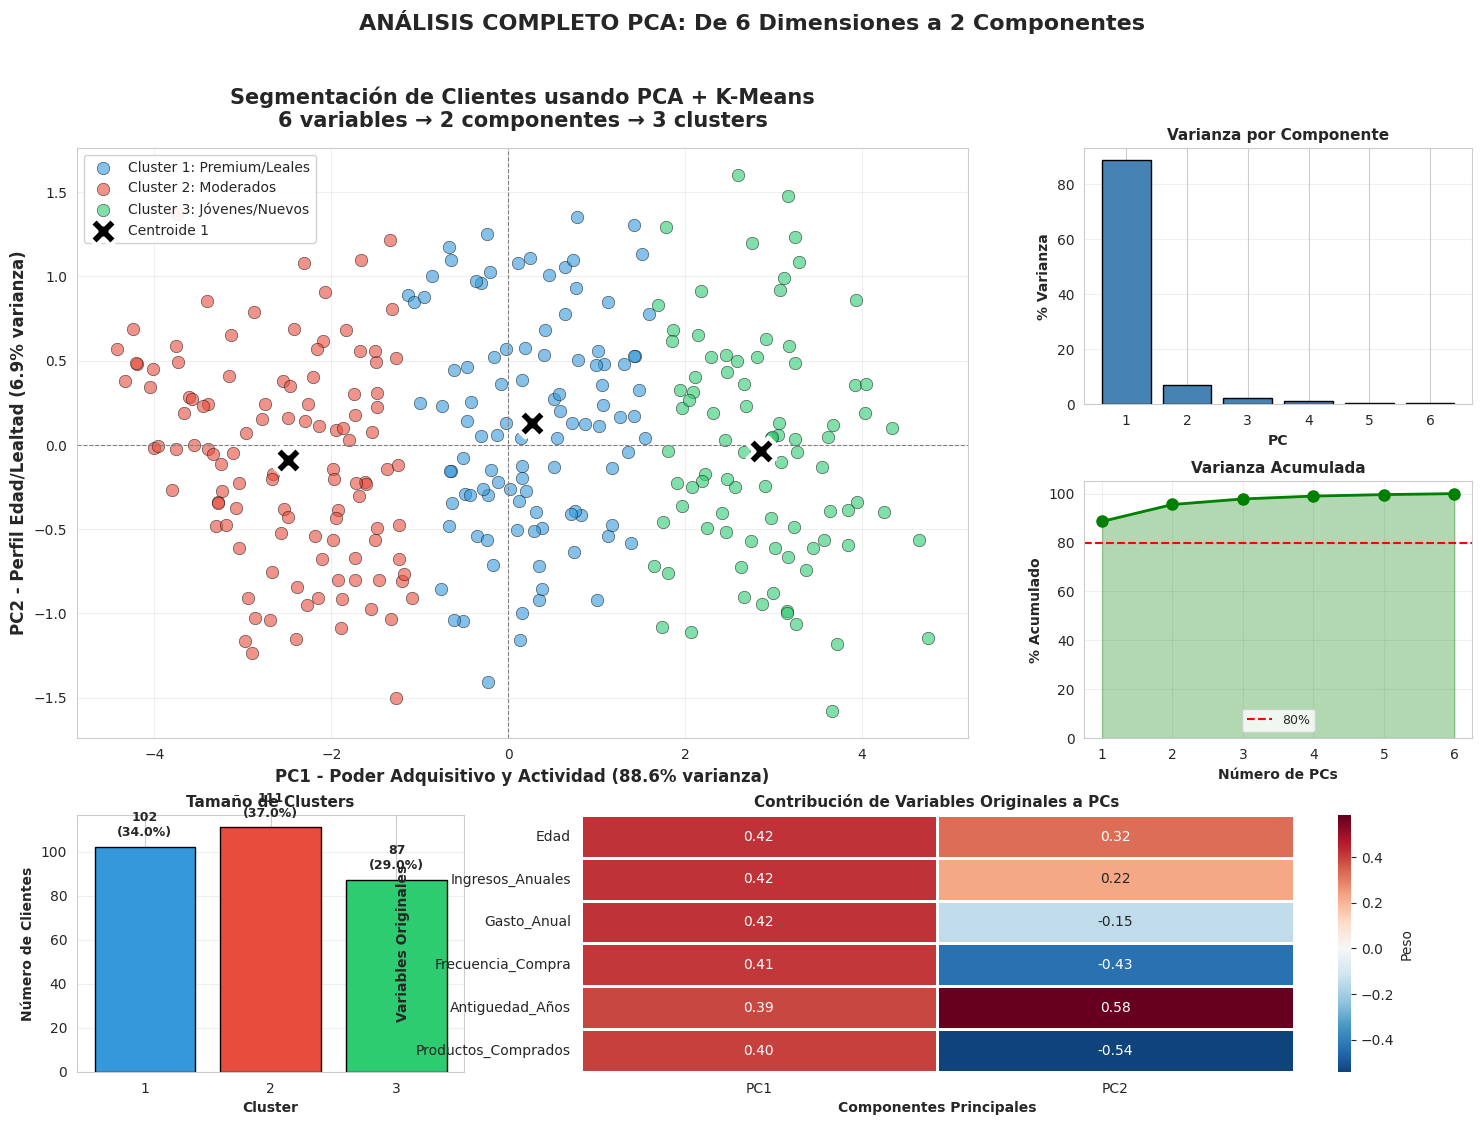


✅ Visualizaciones generadas correctamente


In [12]:
"""
CELDA 10: VISUALIZACIÓN FINAL DEL ANÁLISIS PCA
───────────────────────────────────────────────

Creamos gráficos profesionales para presentar los resultados
"""

print("="*70)
print("GENERANDO VISUALIZACIONES FINALES")
print("="*70)

# Crear figura con múltiples gráficos
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# GRÁFICO 1: PCA con Clusters (PRINCIPAL)
ax1 = fig.add_subplot(gs[0:2, 0:2])

colores = ['#3498db', '#e74c3c', '#2ecc71']
nombres_clusters = ['Premium/Leales', 'Moderados', 'Jóvenes/Nuevos']

for cluster_id in range(n_clusters):
    mask = df_pca['Cluster'] == cluster_id
    ax1.scatter(
        df_pca[mask]['PC1'],
        df_pca[mask]['PC2'],
        c=colores[cluster_id],
        label=f'Cluster {cluster_id+1}: {nombres_clusters[cluster_id]}',
        s=80,
        alpha=0.6,
        edgecolors='black',
        linewidth=0.5
    )

# Marcar centroides
for i, centroide in enumerate(centroides):
    ax1.scatter(
        centroide[0],
        centroide[1],
        c='black',
        marker='X',
        s=400,
        edgecolors='white',
        linewidth=3,
        zorder=10,
        label=f'Centroide {i+1}' if i == 0 else ''
    )

ax1.set_xlabel(f'PC1 - Poder Adquisitivo y Actividad ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)', 
               fontsize=12, fontweight='bold')
ax1.set_ylabel(f'PC2 - Perfil Edad/Lealtad ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)', 
               fontsize=12, fontweight='bold')
ax1.set_title('Segmentación de Clientes usando PCA + K-Means\n6 variables → 2 componentes → 3 clusters', 
              fontsize=15, fontweight='bold', pad=15)
ax1.legend(loc='best', fontsize=10, framealpha=0.9)
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax1.axvline(0, color='gray', linestyle='--', linewidth=0.8)

# GRÁFICO 2: Scree Plot
ax2 = fig.add_subplot(gs[0, 2])
ax2.bar(range(1, 7), var_explicada, color='steelblue', edgecolor='black')
ax2.set_xlabel('PC', fontsize=10, fontweight='bold')
ax2.set_ylabel('% Varianza', fontsize=10, fontweight='bold')
ax2.set_title('Varianza por Componente', fontsize=11, fontweight='bold')
ax2.set_xticks(range(1, 7))
ax2.grid(True, alpha=0.3, axis='y')

# GRÁFICO 3: Varianza Acumulada
ax3 = fig.add_subplot(gs[1, 2])
ax3.plot(range(1, 7), var_acumulada, 'go-', linewidth=2, markersize=8)
ax3.fill_between(range(1, 7), var_acumulada, alpha=0.3, color='green')
ax3.axhline(y=80, color='red', linestyle='--', linewidth=1.5, label='80%')
ax3.set_xlabel('Número de PCs', fontsize=10, fontweight='bold')
ax3.set_ylabel('% Acumulado', fontsize=10, fontweight='bold')
ax3.set_title('Varianza Acumulada', fontsize=11, fontweight='bold')
ax3.set_xticks(range(1, 7))
ax3.set_ylim(0, 105)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# GRÁFICO 4: Distribución de Clusters
ax4 = fig.add_subplot(gs[2, 0])
cluster_counts = df_pca['Cluster'].value_counts().sort_index()
bars = ax4.bar(range(1, n_clusters+1), cluster_counts, color=colores, edgecolor='black')
ax4.set_xlabel('Cluster', fontsize=10, fontweight='bold')
ax4.set_ylabel('Número de Clientes', fontsize=10, fontweight='bold')
ax4.set_title('Tamaño de Clusters', fontsize=11, fontweight='bold')
ax4.set_xticks(range(1, n_clusters+1))
ax4.grid(True, alpha=0.3, axis='y')

# Añadir etiquetas de cantidad
for i, (bar, count) in enumerate(zip(bars, cluster_counts)):
    ax4.text(i+1, count + 5, f'{count}\n({count/len(df_pca)*100:.1f}%)', 
             ha='center', fontweight='bold', fontsize=9)

# GRÁFICO 5: Heatmap de contribución de variables
ax5 = fig.add_subplot(gs[2, 1:])
componentes_matriz = pca.components_.T
sns.heatmap(
    componentes_matriz,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    center=0,
    yticklabels=df.columns,
    xticklabels=['PC1', 'PC2'],
    ax=ax5,
    cbar_kws={'label': 'Peso'},
    linewidths=1
)
ax5.set_title('Contribución de Variables Originales a PCs', 
              fontsize=11, fontweight='bold')
ax5.set_ylabel('Variables Originales', fontsize=10, fontweight='bold')
ax5.set_xlabel('Componentes Principales', fontsize=10, fontweight='bold')

plt.suptitle('ANÁLISIS COMPLETO PCA: De 6 Dimensiones a 2 Componentes', 
             fontsize=16, fontweight='bold', y=0.995)

plt.show()

print("\n✅ Visualizaciones generadas correctamente")

CELDA 11: INTERPRETACIÓN DE NEGOCIO

In [13]:
"""
CELDA 11: INTERPRETACIÓN DE NEGOCIO Y RECOMENDACIONES
──────────────────────────────────────────────────────

Traducimos los resultados técnicos a insights accionables
"""

print("="*70)
print("INTERPRETACIÓN DE NEGOCIO")
print("="*70)

# Analizar cada cluster en detalle
print("\n🎯 PERFILES DE CLIENTES IDENTIFICADOS:")
print("="*70)

for cluster_id in range(n_clusters):
    print(f"\n{'='*70}")
    print(f"📊 CLUSTER {cluster_id+1}: {nombres_clusters[cluster_id].upper()}")
    print(f"{'='*70}")
    
    # Filtrar clientes del cluster
    mask_cluster = df_pca['Cluster'] == cluster_id
    df_cluster_original = df[mask_cluster]
    df_cluster_pca = df_pca[mask_cluster]
    
    # Estadísticas
    n_clientes = len(df_cluster_original)
    porcentaje = n_clientes / len(df) * 100
    
    print(f"\n   👥 TAMAÑO DEL SEGMENTO:")
    print(f"      • {n_clientes} clientes ({porcentaje:.1f}% del total)")
    
    print(f"\n   📊 CARACTERÍSTICAS PROMEDIO:")
    print(f"      • Edad: {df_cluster_original['Edad'].mean():.1f} años")
    print(f"      • Ingresos: ${df_cluster_original['Ingresos_Anuales'].mean():,.0f}")
    print(f"      • Gasto Anual: ${df_cluster_original['Gasto_Anual'].mean():,.0f}")
    print(f"      • Frecuencia: {df_cluster_original['Frecuencia_Compra'].mean():.1f} compras/año")
    print(f"      • Antigüedad: {df_cluster_original['Antiguedad_Años'].mean():.1f} años")
    print(f"      • Productos: {df_cluster_original['Productos_Comprados'].mean():.0f} productos")
    
    print(f"\n   🎯 VALORES PCA:")
    print(f"      • PC1 (Poder adquisitivo): {df_cluster_pca['PC1'].mean():+.2f}")
    print(f"      • PC2 (Perfil edad/lealtad): {df_cluster_pca['PC2'].mean():+.2f}")
    
    # Recomendaciones específicas
    print(f"\n   💡 ESTRATEGIA RECOMENDADA:")
    
    if cluster_id == 0:  # Cluster Premium
        print("      ✓ Programa VIP con beneficios exclusivos")
        print("      ✓ Productos premium y personalizados")
        print("      ✓ Atención al cliente prioritaria")
        print("      ✓ Eventos exclusivos y lanzamientos anticipados")
        
    elif cluster_id == 1:  # Cluster Moderado
        print("      ✓ Cross-selling de productos complementarios")
        print("      ✓ Programas de lealtad con recompensas")
        print("      ✓ Ofertas estacionales personalizadas")
        print("      ✓ Comunicación regular por email/SMS")
        
    else:  # Cluster Jóvenes/Nuevos
        print("      ✓ Descuentos de bienvenida y onboarding")
        print("      ✓ Contenido educativo sobre productos")
        print("      ✓ Programas de referidos para crecimiento")
        print("      ✓ Presencia en redes sociales y marketing digital")

# Resumen ejecutivo
print(f"\n{'='*70}")
print("📋 RESUMEN EJECUTIVO")
print(f"{'='*70}")

print(f"\n🎯 RESULTADOS DEL ANÁLISIS PCA:")
print(f"   • Dataset original: {len(df)} clientes con {len(df.columns)} variables")
print(f"   • Reducción dimensional: 6 variables → 2 componentes principales")
print(f"   • Varianza conservada: {sum(pca.explained_variance_ratio_)*100:.1f}%")
print(f"   • Clusters identificados: {n_clusters} segmentos distintos")

print(f"\n💰 IMPACTO EN NEGOCIO:")
print(f"   • Segmentación clara de clientes en grupos accionables")
print(f"   • Posibilidad de personalizar marketing por segmento")
print(f"   • Optimización de recursos al enfocar estrategias")
print(f"   • Base para modelos predictivos futuros")

print(f"\n🚀 PRÓXIMOS PASOS:")
print(f"   1. Validar segmentación con equipo de marketing")
print(f"   2. Diseñar campañas específicas por cluster")
print(f"   3. Monitorear desempeño de cada segmento")
print(f"   4. Actualizar análisis trimestralmente")

print("\n✅ ANÁLISIS COMPLETADO")

INTERPRETACIÓN DE NEGOCIO

🎯 PERFILES DE CLIENTES IDENTIFICADOS:

📊 CLUSTER 1: PREMIUM/LEALES

   👥 TAMAÑO DEL SEGMENTO:
      • 102 clientes (34.0% del total)

   📊 CARACTERÍSTICAS PROMEDIO:
      • Edad: 46.0 años
      • Ingresos: $68,321
      • Gasto Anual: $20,332
      • Frecuencia: 18.7 compras/año
      • Antigüedad: 5.5 años
      • Productos: 37 productos

   🎯 VALORES PCA:
      • PC1 (Poder adquisitivo): +0.27
      • PC2 (Perfil edad/lealtad): +0.13

   💡 ESTRATEGIA RECOMENDADA:
      ✓ Programa VIP con beneficios exclusivos
      ✓ Productos premium y personalizados
      ✓ Atención al cliente prioritaria
      ✓ Eventos exclusivos y lanzamientos anticipados

📊 CLUSTER 2: MODERADOS

   👥 TAMAÑO DEL SEGMENTO:
      • 111 clientes (37.0% del total)

   📊 CARACTERÍSTICAS PROMEDIO:
      • Edad: 26.7 años
      • Ingresos: $39,514
      • Gasto Anual: $11,851
      • Frecuencia: 10.4 compras/año
      • Antigüedad: 1.8 años
      • Productos: 20 productos

   🎯 VALORES PCA:


CELDA 12: EXPORTAR RESULTADOS

In [ ]:
"""
CELDA 12: EXPORTAR RESULTADOS A CSV
────────────────────────────────────

Guardamos los datos procesados para uso posterior
"""

print("="*70)
print("EXPORTANDO RESULTADOS")
print("="*70)

# 1. Dataset con componentes PCA y clusters
df_resultado = df.copy()
df_resultado['PC1'] = df_pca['PC1']
df_resultado['PC2'] = df_pca['PC2']
df_resultado['Cluster'] = df_pca['Cluster']
df_resultado['Cluster_Nombre'] = df_resultado['Cluster'].map({
    0: 'Premium/Leales',
    1: 'Moderados',
    2: 'Jóvenes/Nuevos'
})

df_resultado.to_csv('clientes_pca_clustering.csv', index=False)
print("✅ Archivo 1: 'clientes_pca_clustering.csv'")
print(f"   → {len(df_resultado)} clientes con variables originales + PCA + Cluster")
print(f"   → Columnas: {list(df_resultado.columns)}")

# 2. Resumen de clusters
resumen_clusters = []

for cluster_id in range(n_clusters):
    mask = df_resultado['Cluster'] == cluster_id
    df_cluster = df_resultado[mask]
    
    resumen_clusters.append({
        'Cluster_ID': cluster_id,
        'Cluster_Nombre': nombres_clusters[cluster_id],
        'N_Clientes': len(df_cluster),
        'Porcentaje': len(df_cluster) / len(df_resultado) * 100,
        'Edad_Promedio': df_cluster['Edad'].mean(),
        'Ingresos_Promedio': df_cluster['Ingresos_Anuales'].mean(),
        'Gasto_Promedio': df_cluster['Gasto_Anual'].mean(),
        'Frecuencia_Promedio': df_cluster['Frecuencia_Compra'].mean(),
        'Antiguedad_Promedio': df_cluster['Antiguedad_Años'].mean(),
        'Productos_Promedio': df_cluster['Productos_Comprados'].mean(),
        'PC1_Promedio': df_cluster['PC1'].mean(),
        'PC2_Promedio': df_cluster['PC2'].mean()
    })

df_resumen = pd.DataFrame(resumen_clusters)
df_resumen.to_csv('resumen_clusters_pca.csv', index=False)
print("\n✅ Archivo 2: 'resumen_clusters_pca.csv'")
print(f"   → {len(df_resumen)} clusters con estadísticas promedio")

# 3. Información de componentes principales
componentes_info = pd.DataFrame({
    'Componente': ['PC1', 'PC2'],
    'Varianza_Explicada_%': pca.explained_variance_ratio_ * 100,
    'Varianza_Acumulada_%': np.cumsum(pca.explained_variance_ratio_) * 100,
    'Eigenvalue': eigenvalues[:2]
})

componentes_info.to_csv('info_componentes_pca.csv', index=False)
print("\n✅ Archivo 3: 'info_componentes_pca.csv'")
print(f"   → Información de los 2 componentes principales")

# 4. Pesos de variables en componentes
pesos_variables = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=df.columns
)
pesos_variables.to_csv('pesos_variables_pca.csv')
print("\n✅ Archivo 4: 'pesos_variables_pca.csv'")
print(f"   → Contribución de cada variable original a PC1 y PC2")

# Mostrar preview del archivo principal
print("\n📋 PREVIEW DEL ARCHIVO PRINCIPAL:")
print("="*70)
print(df_resultado.head(10).to_string())

# Descargar archivos
from google.colab import files

print("\n📥 DESCARGANDO ARCHIVOS...")
print("="*70)

files.download('clientes_pca_clustering.csv')
files.download('resumen_clusters_pca.csv')
files.download('info_componentes_pca.csv')
files.download('pesos_variables_pca.csv')

print("\n✅ TODOS LOS ARCHIVOS DESCARGADOS CORRECTAMENTE")
print("\n🎉 ANÁLISIS PCA COMPLETADO CON ÉXITO")